In [76]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import utilities as ut
import cv2
import pandas as pd
import numpy as np

dataset_paths = ut.images_paths("Images/WarpedCards/")
base_cards_paths = ut.images_paths("Images/Cards/")
work_dir= ut.Config.working_directory




In [45]:
def append_data(row):
    data=row["moments"].copy()
    data = np.append(data,row["hue"])
    return data

In [46]:
labels = []
hu_moments = []
average_hue=[]
samples=[]
for path in dataset_paths:
    properties = ut.label_properties(path)
    samples.append(properties)
    image = cv2.imread(path)
    binary_image,contours = ut.preprocess_image(image)
    hue = ut.average_hue_of_contours(image, [contours[0]])
    average_hue.append(hue)
    moments = cv2.moments(contours[0])
    hu_moments.append(cv2.HuMoments(moments).flatten())
    """if properties["label"] in ['O','B','S','C']:
        total_number=int(properties["value"])
        for i in range(1,total_number):
            hue = ut.average_hue_of_contours(image, [contours[i]])
            average_hue.append(hue)
            moments = cv2.moments(contours[0])
            hu_moments.append(cv2.HuMoments(moments).flatten())
            samples.append(properties)"""

    
df_raw = pd.DataFrame(samples)
df_raw["moments"] = hu_moments
df_raw["hue"] = average_hue
df_raw["data"] = df_raw.apply(append_data,axis=1)
print(df_raw)

    value seed label index                                            moments  \
0       A    S    AS    AS  [0.29708668535191635, 0.029094842219166906, 0....   
1       3    C     C     C  [0.20638244610921244, 0.011143321441366512, 0....   
2       R    B     R     R  [0.2582714829710314, 0.031000242073562775, 0.0...   
3       7    C     C     C  [0.2263709289767804, 0.016535570717469073, 0.0...   
4       R    B     R     R  [0.26702146217980904, 0.0353243406247827, 0.00...   
..    ...  ...   ...   ...                                                ...   
955     8    S     8     8  [0.3349146703892571, 0.0524076725865937, 0.002...   
956     6    S     S     S  [0.4933547172763234, 0.2016003171050743, 0.008...   
957     6    B     B     B  [0.3205906425818907, 0.07426483757664872, 0.00...   
958     7    C     C     C  [0.21349935517642757, 0.012488420067048202, 0....   
959     A    C    AC    AC  [0.23740392729956644, 0.026290079638281526, 0....   

           hue             

In [47]:
labels = []
hu_moments = []
samples=[]
average_hue=[]
for path in base_cards_paths:
    samples.append(ut.label_class_only(path))
    image = cv2.imread(path)
    binary_image,contours = ut.preprocess_image(image)
    hue = ut.average_hue_of_contours(image, [contours[0]])
    average_hue.append(hue)
    moments = cv2.moments(contours[0])
    hu_moments.append(cv2.HuMoments(moments).flatten())
df_base = pd.DataFrame(samples)
df_base["moments"] = hu_moments
df_base["hue"] = average_hue
df_raw["data"] = df_raw.apply(append_data,axis=1)
print(df_base)


   value seed label                                            moments  \
0      7    C     C  [0.22225804081103337, 0.01594525095038476, 0.0...   
1      A    C    AC  [0.24305554848722474, 0.028763687428324046, 2....   
2      R    B     R  [0.26686700528342994, 0.03424285951895691, 0.0...   
3      7    S     7  [0.7296534270326875, 0.1525365272091704, 0.238...   
4      8    C     8  [0.40925092982787187, 0.10357475336507306, 0.0...   
5      4    O     4  [0.24825667613837687, 0.01543724752987511, 0.0...   
6      6    C     C  [0.248431159173635, 0.028764490485784156, 0.00...   
7      R    S     R  [0.26074346777962304, 0.030003292785587676, 0....   
8      4    C     C  [0.2142792002949413, 0.014672966581150875, 0.0...   
9      3    S    3S  [0.3549009320799103, 0.04035568095240079, 0.00...   
10     2    C    2C  [0.1870315616498156, 0.00036129249108887343, 0...   
11     5    S     5  [0.3911050708229767, 0.050549019411397944, 0.0...   
12     8    O     8  [0.44017008618482

In [48]:
filter = ['O','B','S','C']

df_raw_filtered= df_raw#[(df_raw['label'].isin(filter))]
df_base_filtered= df_base#[df_base['label'].isin(filter)]
print(df_raw_filtered)

    value seed label index                                            moments  \
0       A    S    AS    AS  [0.29708668535191635, 0.029094842219166906, 0....   
1       3    C     C     C  [0.20638244610921244, 0.011143321441366512, 0....   
2       R    B     R     R  [0.2582714829710314, 0.031000242073562775, 0.0...   
3       7    C     C     C  [0.2263709289767804, 0.016535570717469073, 0.0...   
4       R    B     R     R  [0.26702146217980904, 0.0353243406247827, 0.00...   
..    ...  ...   ...   ...                                                ...   
955     8    S     8     8  [0.3349146703892571, 0.0524076725865937, 0.002...   
956     6    S     S     S  [0.4933547172763234, 0.2016003171050743, 0.008...   
957     6    B     B     B  [0.3205906425818907, 0.07426483757664872, 0.00...   
958     7    C     C     C  [0.21349935517642757, 0.012488420067048202, 0....   
959     A    C    AC    AC  [0.23740392729956644, 0.026290079638281526, 0....   

           hue             

In [49]:
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
scaling.fit(df_raw_filtered["data"].tolist())
Scaled_data=scaling.transform(df_raw_filtered["data"].tolist())
#principal=PCA(n_components=7)
#principal.fit(Scaled_data)
#x=principal.transform(Scaled_data)
x=Scaled_data
print(x.shape)

(960, 8)


In [50]:
X_train, X_test, y_train, y_test = train_test_split(x,df_raw_filtered["label"].tolist(), test_size=0.2, random_state=42)
"""X_test = x
X_train = scaling.transform(df_base_filtered["data"].to_list())
y_test = df_raw_filtered["label"].tolist()
y_train = df_base_filtered["label"].tolist()"""


'X_test = x\nX_train = scaling.transform(df_base_filtered["data"].to_list())\ny_test = df_raw_filtered["label"].tolist()\ny_train = df_base_filtered["label"].tolist()'

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'C': [0.1, 1, 10, 100], # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001], # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.
    'kernel': ['rbf', 'poly', 'sigmoid'] # Specifies the kernel type to be used in the algorithm
}
grid_svm = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=2, cv=5)
grid_svm.fit(X_train, y_train)
f_clf = RandomForestClassifier(n_estimators=10)
f_clf = f_clf.fit(X_train,y_train)

print("Best Parameters:", grid_svm.best_params_)
print("Best Estimator:", grid_svm.best_estimator_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s


[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ...................

In [52]:

#predictions = grid_svm.predict(X_test)
predictions = f_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.9947916666666666
Classification Report:
              precision    recall  f1-score   support

          2B       1.00      1.00      1.00         6
          2C       1.00      1.00      1.00         5
          2S       1.00      1.00      1.00         4
          3B       1.00      1.00      1.00         5
          3S       1.00      1.00      1.00         9
          4O       1.00      1.00      1.00         5
          4S       1.00      1.00      1.00         8
          5S       1.00      1.00      1.00         2
          7S       1.00      1.00      1.00         8
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00        22
          AB       1.00      1.00      1.00         1
          AC       1.00      1.00      1.00         6
          AO       1.00      0.80      0.89         5
          AS       1.00      1.00      1.00         3
           B       1.00      1.00      1.00        16
           C       1.00      

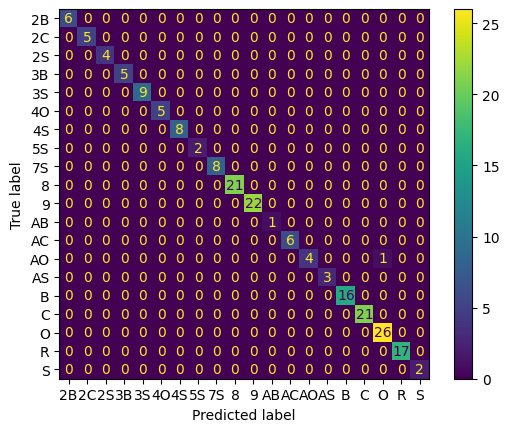

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions, labels=grid_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=grid_svm.classes_)
disp.plot()

In [54]:
df_raw.to_csv("workingDirectory/pollo.csv")


In [55]:
import joblib
joblib.dump(f_clf,ut.Config.working_directory+"forest_classifier.sav")

['workingDirectory/forest_classifier.sav']

In [56]:
clf = f_clf

In [77]:
#test_image = cv2.imread('Images/DatasetCropped/8O-1.jpg')
test_image = cv2.imread(work_dir+"opencv_frame_0.png")
image = cv2.imread(path)
binary_image,contours_test = ut.preprocess_image(test_image)
hue = ut.average_hue_of_contours(test_image, [contours_test[0]])
moments = cv2.moments(contours_test[0])
hu_moments_test= cv2.HuMoments(moments).flatten()
data = hu_moments_test.copy()
data = np.append(data,hue)
print(data)
data=scaling.transform(data.reshape(1, -1))
result=clf.predict(data)
print(result)

[ 2.17197072e-01  1.89942090e-02  5.09303503e-06  6.37715309e-07
 -1.01746604e-12 -7.70875271e-08  5.34438097e-13  5.47123746e+01]
['O']


In [78]:
if result in ['O','B','S','C']:
    counter=1
    for contour in contours_test[1:7]:
        print(counter)
        moments = cv2.moments(contour)
        hu_moments_test= cv2.HuMoments(moments).flatten()
        hue = ut.average_hue_of_contours(test_image, [contour])
        data = hu_moments_test.copy()
        data = np.append(data,hue)
        data=scaling.transform(data.reshape(1, -1))
        if clf.predict(data)== result:
            counter+=1
        else: break

print("{}{}".format(result,counter))

1
['O']1
